In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt

# matplotlib image size and resolution
mpl_options = {"figsize":(10,10)}
sb.set(rc={'figure.figsize':(12,8)})

from inspect import signature as sig

### The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, …

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

### Most boosting algorithms consist of iteratively learning weak classifiers with respect to a distribution and adding them to a final strong classifier. When they are added, they are weighted in a way that is related to the weak learners' accuracy. After a weak learner is added, the data weights are readjusted, known as "re-weighting".

### Загрузим датасет

In [2]:
from sklearn import datasets

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target
XX = X[['Petal Length','Sepal Length']]

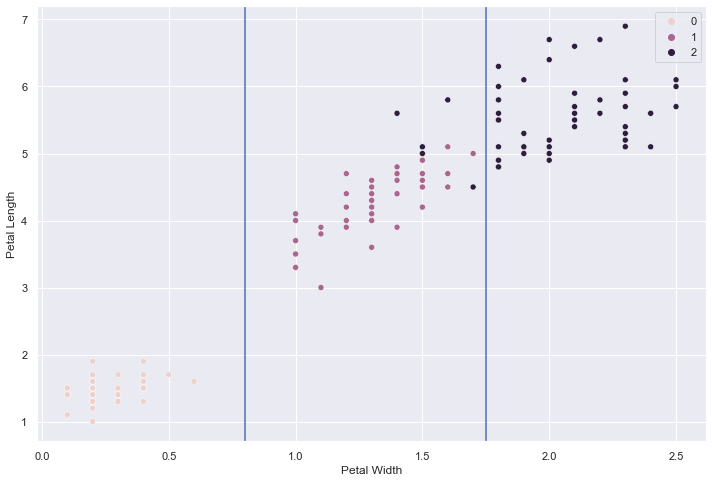

In [3]:
sb.scatterplot(x = 'Petal Width', y = 'Petal Length', data = X, hue = y)
plt.axvline(x=.8)
plt.axvline(x=1.75)

### попробуем GradientBoostingClassifier

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0, verbose = 1).fit(XX, y)

      Iter       Train Loss   Remaining Time 
         1           0.3187            0.27s
         2           0.1738            0.24s
         3           0.1400            0.23s
         4           0.1159            0.22s
         5           0.1027            0.24s
         6           0.0972            0.24s
         7           0.0893            0.23s
         8           0.0855            0.22s
         9           0.0811            0.22s
        10           0.0790            0.22s
        20           0.0577            0.16s
        30           0.0489            0.13s
        40           0.0447            0.12s
        50           0.0409            0.10s
        60           0.0386            0.08s
        70           0.0372            0.06s
        80           0.0365            0.04s
        90           0.0351            0.02s
       100           0.0344            0.00s


### попробуем AdaBoostClassifier

In [5]:
from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(n_estimators=100).fit(XX, y)

### сравним с DecisionTreeClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(XX, y)

### сравним с RandomForest

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(verbose=1).fit(XX, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [8]:
def show(clf, title):
    points = np.random.randint(100,800,size=(10000,2))/100
    answers = clf.predict(points).reshape(10000,1)
    stack = np.hstack((points, answers))

    s0 = np.array([i[:2] for i in stack  if i[2] == 0])
    s1 = np.array([i[:2] for i in stack  if i[2] == 1])
    s2 = np.array([i[:2] for i in stack  if i[2] == 2])

    sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

    plt.axvline(x=2.45)
    plt.axvline(x=4.75)
    plt.axvline(x=5.05)
    plt.axhline(y=4.95)
    plt.axhline(y=6.5)
    plt.axhline(y=6.05)
    plt.axvline(x=3.9)
    plt.axvline(x=4.86)
    plt.axhline(y=6.25)
    plt.axhline(y=5.95)

    plt.scatter(s0[:,0], s0[:,1] , color = 'orange', s = 3)
    plt.scatter(s1[:,0], s1[:,1] , color = 'red', s = 3)
    plt.scatter(s2[:,0], s2[:,1] , color = 'blue', s = 3)
    
    plt.title(title)

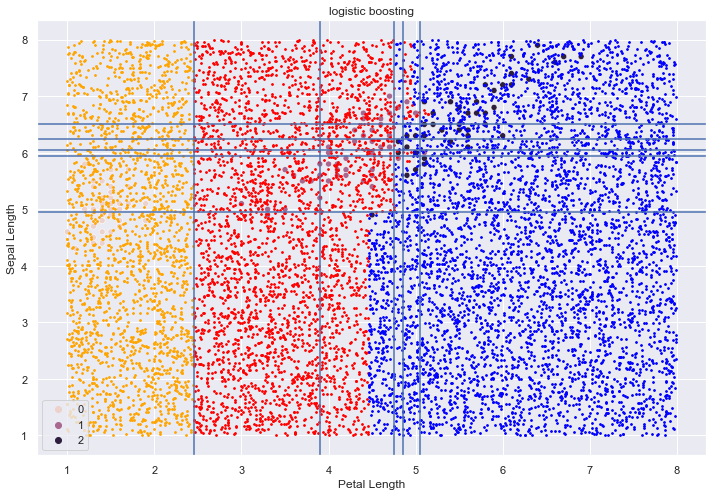

In [9]:
show(clf1, 'logistic boosting')

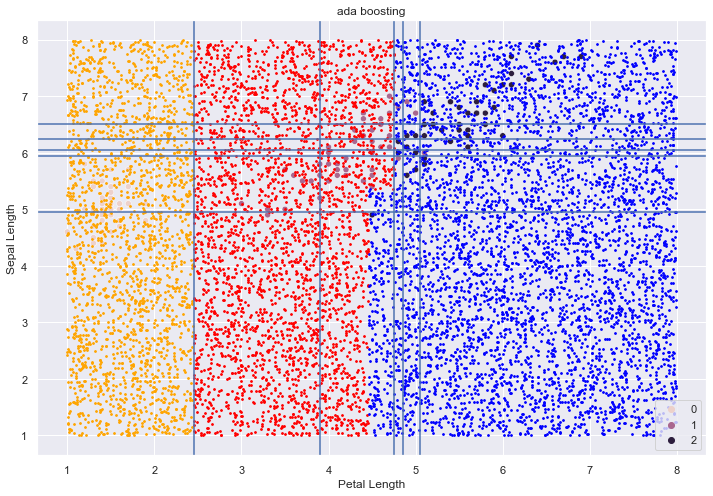

In [10]:
show(clf2, 'ada boosting')

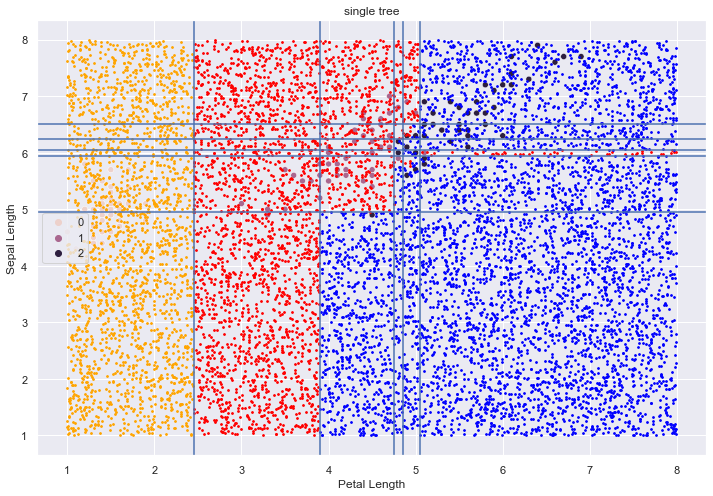

In [11]:
show(clf3, 'single tree')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


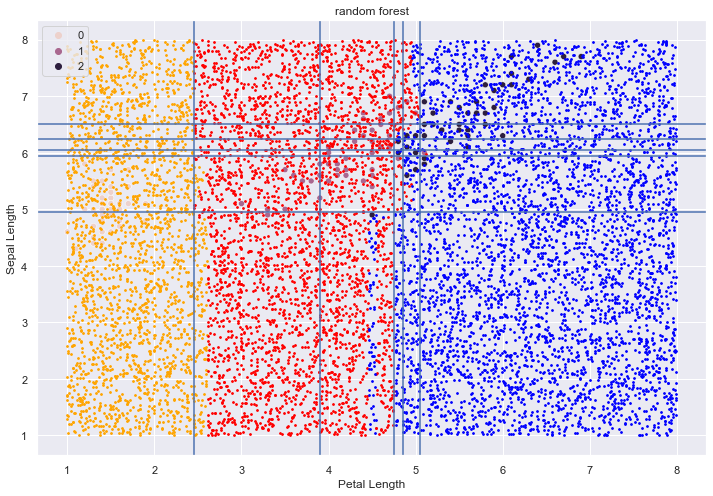

In [12]:
show(clf4, 'random forest')

## Попробуем регрессию и заодно какие нибудь метрики (MSE)

In [30]:
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.datasets import make_friedman1

cutoff = 500

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:cutoff], X[cutoff:]
y_train, y_test = y[:cutoff], y[cutoff:]

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
clf1 = GradientBoostingRegressor().fit(X_train, y_train)
mean_squared_error(y_test, clf1.predict(X_test))

2.7717256795785747

In [15]:
from sklearn.ensemble import AdaBoostRegressor
clf2 = AdaBoostRegressor().fit(X_train, y_train)
mean_squared_error(y_test, clf2.predict(X_test))

5.425050831809489

#### Every learning algorithm tends to suit some problem types better than others, and typically has many different parameters and configurations to adjust before it achieves optimal performance on a dataset. AdaBoost (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier

In [16]:
sig(AdaBoostRegressor)

<Signature (base_estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)>

In [17]:
from sklearn.ensemble import RandomForestRegressor
clf3 = RandomForestRegressor().fit(X_train, y_train)
mean_squared_error(y_test, clf3.predict(X_test))

4.4495967306208914

In [18]:
import statsmodels.api as sm
clf4 = sm.OLS(y_train, X_train).fit()
mean_squared_error(y_test, clf4.predict(X_test))

6.271471189294833

In [19]:
import statsmodels.api as sm
clf5 = sm.OLS(y_train, X_train).fit_regularized()
mean_squared_error(y_test, clf5.predict(X_test))

6.279263457346801

In [20]:
from sklearn.ensemble import BaggingRegressor as Bagging
clf6 = Bagging().fit(X_train, y_train)
mean_squared_error(y_test, clf6.predict(X_test))

5.175753191231968

### Единственный способ проранжировать их это сравнить по размеру трэйн-тест

In [31]:
from time import time


In [34]:
X, y = make_friedman1(n_samples=2000, random_state=0, noise=1.0, n_features=10)

metric = mean_absolute_error
metric = mean_squared_error


def run(cutoff):
    X_train, X_test = X[:cutoff], X[cutoff:2*cutoff]
    y_train, y_test = y[:cutoff], y[cutoff:2*cutoff]
    
    x = time()
    clf1 = GradientBoostingRegressor(criterion = 'mae').fit(X_train, y_train)
    z = time()
    mse1 = z - x 
    
    #metric(y_test, clf1.predict(X_test))
    
    x = time()
    clf2 = AdaBoostRegressor().fit(X_train, y_train)
    z = time()
    mse2 = z - x 
    
    #mse2 = metric(y_test, clf2.predict(X_test))
    
    x = time()
    clf3 = RandomForestRegressor().fit(X_train, y_train)
    z = time()
    mse3 = z - x 
    
    #mse3 = metric(y_test, clf3.predict(X_test))
    
    x = time()
    clf4 = sm.OLS(y_train, X_train).fit()
    z = time()
    mse4 = z - x 
    
    #mse4 = metric(y_test, clf4.predict(X_test))
    
    x = time()
    clf5 = sm.OLS(y_train, X_train).fit_regularized(method = 'elastic_net')
    z = time()
    mse5 = z - x 
    
    #mse5 = metric(y_test, clf5.predict(X_test))
    
    x = time()
    clf6 = Bagging().fit(X_train, y_train)
    z = time()
    mse6 = z - x 
    
    #mse6 = metric(y_test, clf6.predict(X_test))
    
    return [mse1, mse2, mse3, mse4, mse5, mse6]

In [37]:
mses = np.array([run(10*x) for x in range(10,50)]);

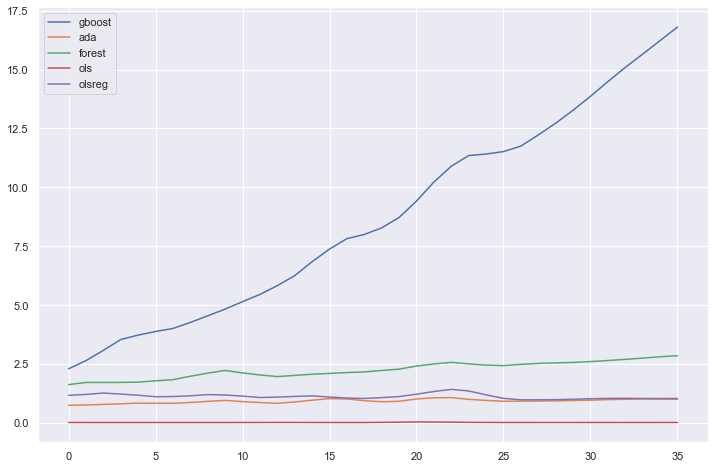

In [38]:
fig, ax = plt.subplots()

for i, name in zip(range(5),['gboost', 'ada', 'forest', 'ols', 'olsreg', 'olsbag']):
    plt.plot(np.convolve(mses[:,i],[1,2,3,2,1], mode='valid'), label = name)
    
ax.legend()
plt.savefig('benchmarking')